# **Predict Fare of AirLine Tickets**

# **1. Project Overview**
 Air travel prices fluctuate due to multiple factors such as time of booking, airline, source and destination cities, total stops, and travel duration. Predicting the fare accurately is a challenging regression problem that requires analyzing structured data and identifying meaningful patterns.

In this project, we aim to build a machine learning model that predicts the price of airline tickets based on various flight-related attributes. By doing so, we can help customers make better travel decisions and assist airlines or travel agencies in optimizing their pricing strategies.

This project involves data cleaning, feature engineering, exploratory data analysis (EDA), model training, and performance evaluation.



# **2. Project Problem Statement**
Given a dataset containing details about different airline flights — such as airline name, date of journey, source, destination, route, duration, total stops, and additional information — the goal is to **predict the ticket price** for a given set of flight features.

The main challenge lies in dealing with heterogeneous data types (categorical, numerical, and temporal) and capturing complex relationships between multiple variables that influence airfare.

Formally, we want to learn a mapping function:

f(X)→y

where  
- \( X \) = flight-related features (Airline, Source, Destination, Date_of_Journey, Duration, Total_Stops, etc.)  
- \( y \) = Ticket Price  


# 3. **Project Objectives**

1.   List item
2.   List item



The objectives of this project are:

1. **Data Understanding:**  
   Explore the dataset to identify patterns, correlations, and missing information that affect ticket pricing.

2. **Data Preprocessing:**  
   Handle missing values, convert categorical variables to numerical form, and create new features (e.g., departure hour, journey month, total duration in minutes).

3. **Exploratory Data Analysis (EDA):**  
   Visualize relationships between different features and the fare to gain insights into key drivers of price variation.

4. **Model Development:**  
   Build and compare different regression models such as Linear Regression, Random Forest, and Gradient Boosting to predict flight fares accurately.

5. **Model Evaluation:**  
   Evaluate models using performance metrics like MAE, RMSE, and R² score to assess prediction accuracy.

6. **Insights and Recommendations:**  
   Interpret the model’s results to provide actionable insights for both travelers and airline businesses.

**End Goal:**  
Develop a robust, interpretable, and well-generalized model capable of predicting airline ticket prices with high accuracy, while demonstrating strong understanding of the end-to-end machine learning workflow.

#**4.0 Data Understanding and Loading**

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')

# View basic info
print("Data shape:", data.shape)
data.head()

Data shape: (10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **5.0 Data Inspection**

In [ ]:
# Check for missing values
data.isnull().sum()

# Basic descriptive statistics
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


**Observation**

- **Mean:** 9,087  
- **Standard Deviation:** 4,611  
- **Minimum:** 1,759  
- **Maximum:** 79,512  
- **Insight:** Highly right-skewed distribution — few very expensive flights.


  > Price distribution suggests **long-tailed behavior** — most flights are moderately priced, but a few are premium or business-class fares.  
  > We may consider **log-scaling the target variable** during modeling to stabilize variance.


In [ ]:
# Summary for categorical columns
data.describe(include=['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


Observation:

- 10,683 total records (rows)

- 11 columns (features)

- Data types are mostly object (categorical or string) except for Price, which is int64.


The dataset is relatively small but sufficient for supervised learning.
Most columns are categorical or text-based, suggesting we’ll need significant preprocessing before modeling.
The target variable, Price, is numeric and looks appropriate for a regression task.

In [ ]:
# Count missing values per column
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


Observation:

- Route → 1 missing value

- Total_Stops → 1 missing value

- Others → 0 missing

The dataset is very clean, only one or two missing values, which can be safely dropped without affecting model performance.
For larger missing patterns, we’d consider imputation, but here, simple row removal is acceptable.

In [ ]:
# Drop rows with missing values
data = data.dropna()
print("Shape after dropping missing values:", data.shape)
data.isnull().sum()

Shape after dropping missing values: (10682, 11)


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
data['Total_Stops'].isnull()

,Total_Stops
0,False
1,False
2,False
3,False
4,False
...,...
10678,False
10679,False
10680,False
10681,False


In [ ]:
# getting all the rows where we have missing value

data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [ ]:
# Number of unique entries per column
data.nunique()

,0
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


**Unique Value Counts**

| **Column**           | **Unique Values** | **Andrew’s Interpretation** |
|----------------------|------------------:|------------------------------|
| **Airline**          | 12               | Small categorical feature — encode easily. |
| **Date_of_Journey**  | 44               | Represents 44 distinct days — convert to datetime for feature extraction. |
| **Source**           | 5                | Limited categories — good. |
| **Destination**      | 6                | Limited categories — good. |
| **Route**            | 128              | Complex text feature — may need to extract total stops or number of connections. |
| **Dep_Time**         | 222              | Represents departure time — we’ll extract hour. |
| **Arrival_Time**     | 1343             | Includes date overflow (arrival next day) — needs careful parsing. |
| **Duration**         | 368              | Text-based — convert to total minutes. |
| **Total_Stops**      | 5                | Ordinal variable (non-stop → 4 stops) — map to integers. |
| **Additional_Info**  | 10               | Mostly “No info”, low variance — might be dropped. |
| **Price**            | 1870             | Continuous target variable — suitable for regression. |


> Several features are textual representations of time or sequence (*Duration*, *Dep_Time*, *Arrival_Time*, *Route*).  
> These will require **feature engineering** to become meaningful numeric predictors.

In [ ]:
# Check for duplicate rows
data.duplicated().sum()

np.int64(220)

**Observation**:

- 220 duplicate rows found.

Removing duplicates prevents data leakage and ensures our model doesn’t overfit to repeated examples.”


In [ ]:
# getting all the rows where we have missing value

# Identify duplicate rows and store them in 'duplicates' variable
duplicates = data[data.duplicated(keep=False)]

duplicates.sort_values(by=list(data.columns)).head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
9913,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
4603,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
5042,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
6377,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
3598,Air India,1/05/2019,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,08:55 02 May,23h 5m,2 stops,No info,13227


**Our model learns from examples. If the same example is repeated multiple times with the same label (Price), it doesn't improve generalization — it may even bias the model slightly toward these duplicates**.

**Therefore, it’s best practice to remove exact duplicates**




In [ ]:
# Before dropping
print(f"Shape before removing duplicates: {data.shape}")

# Drop exact duplicates
data = data.drop_duplicates()

# After dropping
print(f"Shape after removing duplicates: {data.shape}")

Shape before removing duplicates: (10682, 11)
Shape after removing duplicates: (10462, 11)


In [ ]:
# Double-check that no duplicates remain
data.duplicated().sum()

np.int64(0)

In [ ]:
# Data Types
data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


 **Observation**

All features except **Price** are of type **object (string)**.

> Since machine learning models operate on numeric data, we must transform categorical and time-based string features into numeric representations.  
> Typical steps include **label encoding**, **one-hot encoding**, and **date/time extraction**.


In [ ]:
# Example: Check if 'Date_of_Journey' is stored as string instead of datetime
data['Date_of_Journey'].head()

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019


## **Summary — Preprocessing Plan (Based on Inspection)**

| **Step** | **Action** |
|:--:|:--|
| **1** | Drop 2 missing-value rows (*Route*, *Total_Stops*). |
| **2** | Remove 220 duplicate rows. |
| **3** | Convert *Date_of_Journey* to datetime; extract **day** and **month**. |
| **4** | Parse *Duration* → convert to **total minutes**. |
| **5** | Parse *Dep_Time* and *Arrival_Time* → extract **hour** and **minute**. |
| **6** | Encode *Total_Stops* **ordinally**. |
| **7** | Label encode *Airline*, *Source*, and *Destination*. |
| **8** | Drop *Additional_Info* (mostly “No info”). |
| **9** | Consider **log-transforming Price** for modeling. |


# **5.0 Data Preprocessing**

###Converting Date Columns to Datetime Format

Many of our time-related features (such as `Date_of_Journey`, `Dep_Time`, and `Arrival_Time`) are currently stored as strings (`object` type).  
To perform time-based feature engineering effectively, we first need to convert these columns into `datetime` format.


In [ ]:
# Define a helper function to convert string columns into datetime
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Suppress unnecessary warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Check the column names before conversion
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Convert relevant features into datetime format
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_datetime(feature)

In [ ]:
# Verify conversion
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


Always check that your data types are correct after preprocessing. Incorrect formats can silently break your feature extraction logic later in the pipeline

In [ ]:
# Convert 'Date_of_Journey' to datetime
data['Date_of_Journey'] = pd.to_datetime(
    data['Date_of_Journey'], format="%d/%m/%Y", errors='coerce'
)

# Extract day, month and year from journey date
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-10-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-10-12 05:50:00,2025-10-12 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-10-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


### Extracting Derived Attributes from Departure and Arrival Times

Time features such as `Dep_Time` (departure) and `Arrival_Time` (arrival) can provide valuable insights into flight duration, schedule patterns, and ticket pricing.  
Here, we’ll extract hour and minute components from these datetime columns to use as model features.


In [ ]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_year'],
      dtype='object')

In [ ]:
# Departure time is when a plane leaves the gate.

extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-10-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-10-12 05:50:00,2025-10-12 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-10-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [ ]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-10-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-10-12 05:50:00,2025-10-12 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-10-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

##  Handling the "Duration" Feature

The `Duration` column represents the total travel time in mixed string format (e.g., "2h 50m", "5h", "50m").  
To use it in our model, we need to convert it into numerical form — either as total minutes or separate hour and minute columns.


In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [ ]:
# Inspect a few examples of the 'Duration' column
data['Duration'].head(10)

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m
5,2h 25m
6,15h 30m
7,21h 5m
8,25h 30m
9,7h 50m


In [ ]:
# Normalize all duration strings to ensure both hours and minutes are present
duration_list = []

for i in data['Duration']:
    # Example: "5h" -> "5h 0m", "45m" -> "0h 45m"
    if 'h' not in i:
        i = '0h ' + i
    elif 'm' not in i:
        i = i + ' 0m'
    duration_list.append(i)

# Replace the column with standardized text
data['Duration'] = duration_list

In [ ]:
# Split duration into hours and minutes, then convert to integers
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split('h')[0]))
data['Duration_minutes'] = data['Duration'].apply(lambda x: int(x.split('m')[0].split(' ')[-1]))

# Optional: Create total duration in minutes (useful for models)
data['Duration_total_mins'] = data['Duration_hours'] * 60 + data['Duration_minutes']

In [ ]:
# Drop the original 'Duration' column to avoid redundancy
data.drop('Duration', axis=1, inplace=True)

In [ ]:
# Display the first few rows to verify the transformation
data[['Duration_hours', 'Duration_minutes', 'Duration_total_mins']].head()

,Duration_hours,Duration_minutes,Duration_total_mins
0,2,50,170
1,7,25,445
2,19,0,1140
3,5,25,325
4,4,45,285


When converting textual time data, always handle irregular formats first.
Feature consistency ensures that downstream models don’t misinterpret missing or malformed values.

## **Summary of New Features**

| **Feature** | **Description** |
|:--|:--|
| **Duration_hours** | Duration hours extracted as integer. |
| **Duration_minutes** | Duration minutes extracted as integer. |
| **Duration_total_mins** | Total duration converted into minutes (numeric form for modeling). |


# **Exploratory Data Analysis**

## Visual Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up consistent style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

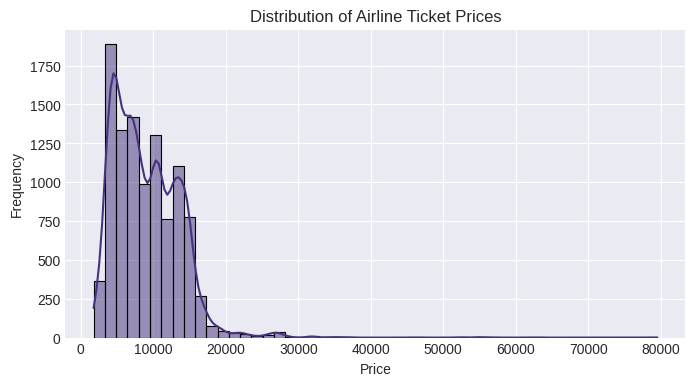

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Airline Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

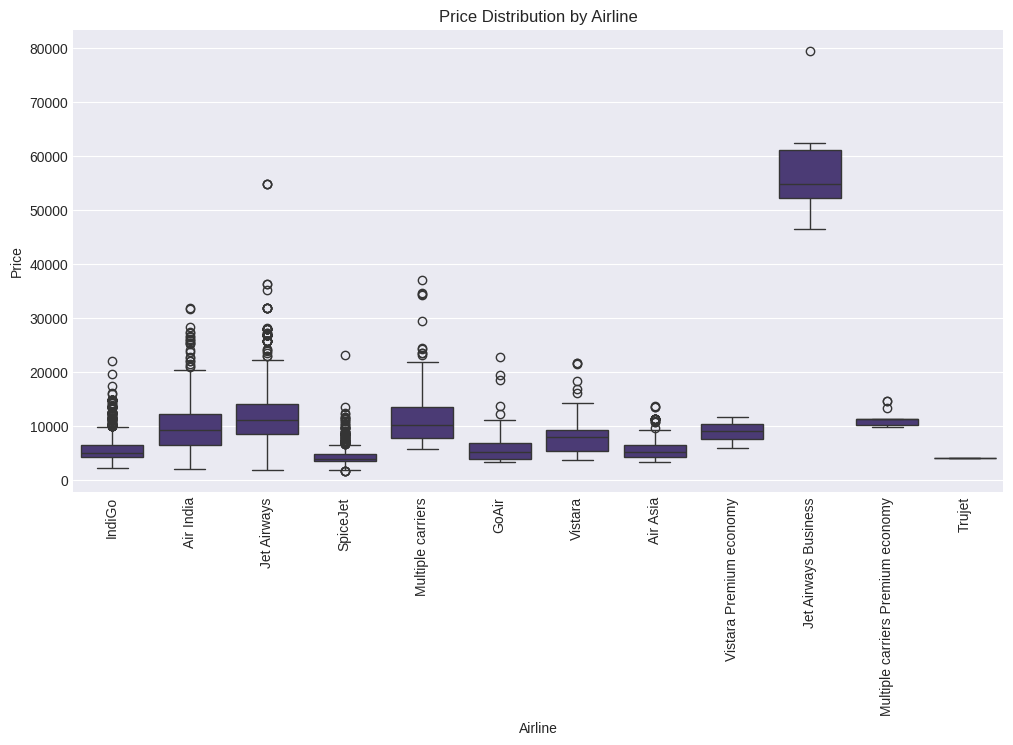

In [ ]:
# Boxplot: Price vs Airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Airline')
plt.show()

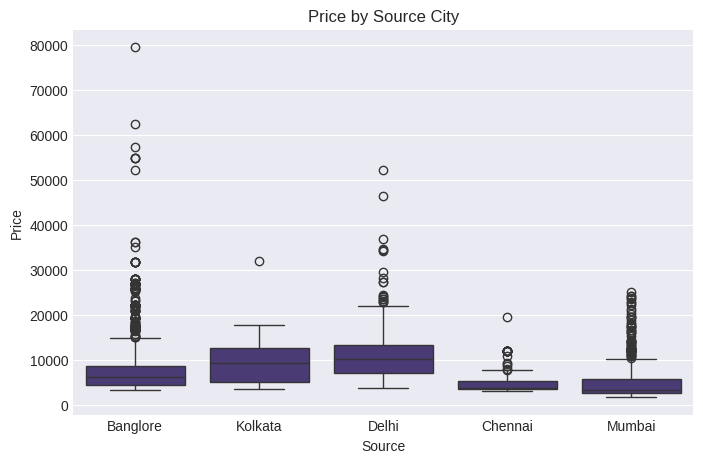

In [ ]:
# Boxplot: Price vs Source
plt.figure(figsize=(8, 5))
sns.boxplot(x='Source', y='Price', data=data)
plt.title('Price by Source City')
plt.show()

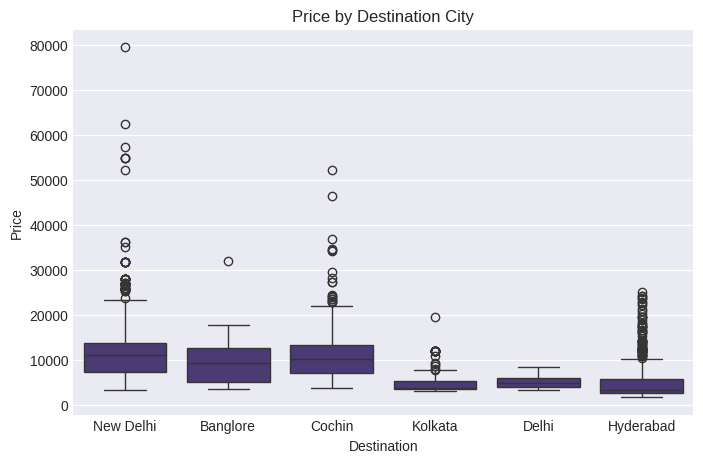

In [ ]:
# Boxplot: Price vs Destination
plt.figure(figsize=(8, 5))
sns.boxplot(x='Destination', y='Price', data=data)
plt.title('Price by Destination City')
plt.show()

## **Relationship Analysis**

 Correlation heatmap for numerical features

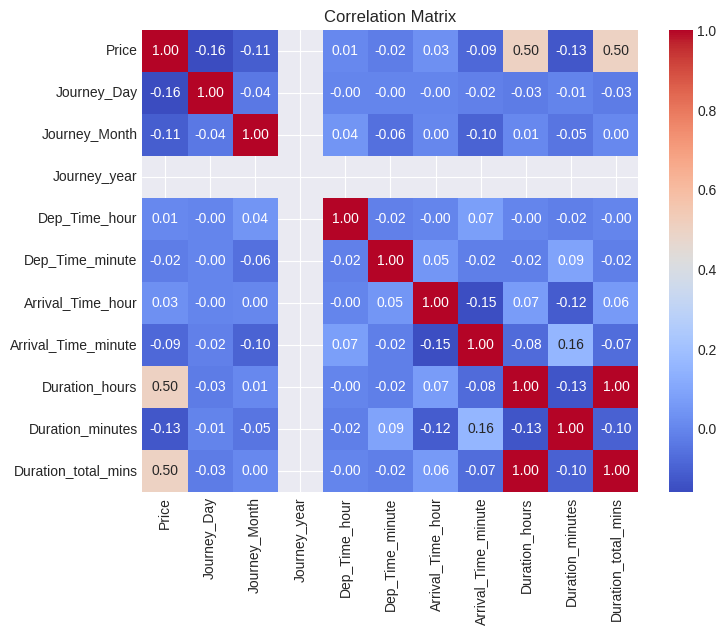

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Scatter plot: Duration vs Price

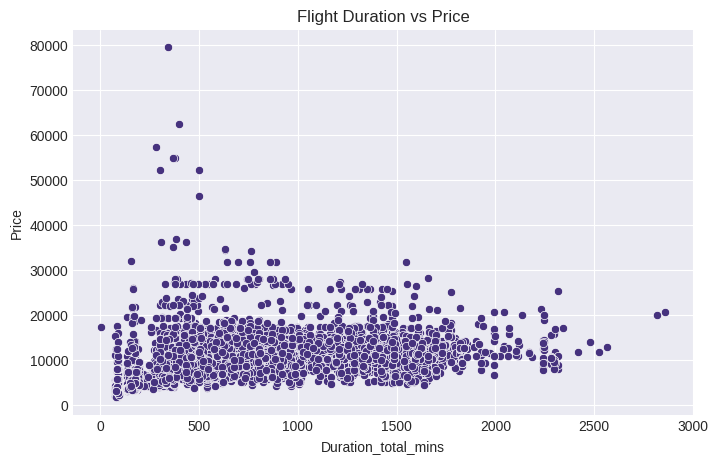

In [ ]:
# Scatter plot: Duration vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration_total_mins', y='Price', data=data)
plt.title('Flight Duration vs Price')
plt.show()

Relationship: Total Stops vs Price

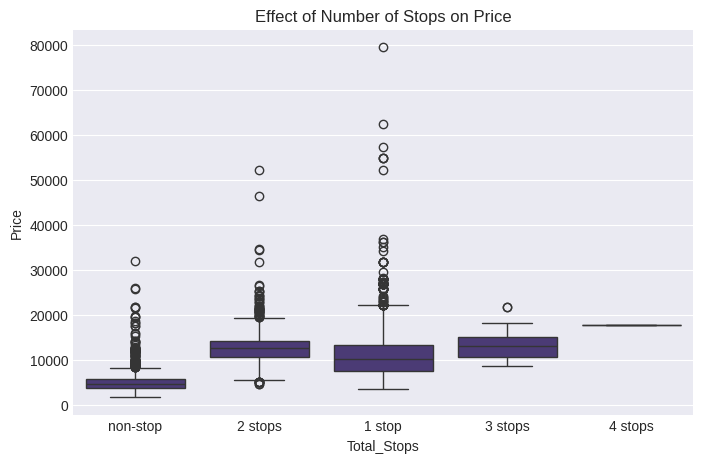

In [ ]:
# Relationship: Total Stops vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Effect of Number of Stops on Price')
plt.show()

 Plot departure time category counts

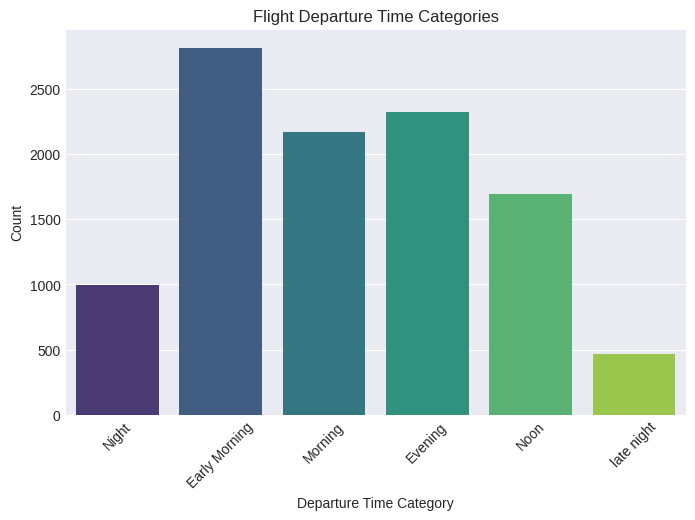

In [ ]:
# Plot departure time category counts
plt.figure(figsize=(8, 5))
sns.countplot(
    x=data['Dep_Time_hour'].apply(flight_dep_time),
    palette="viridis"
)
plt.title('Flight Departure Time Categories', fontsize=12)
plt.xlabel('Departure Time Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

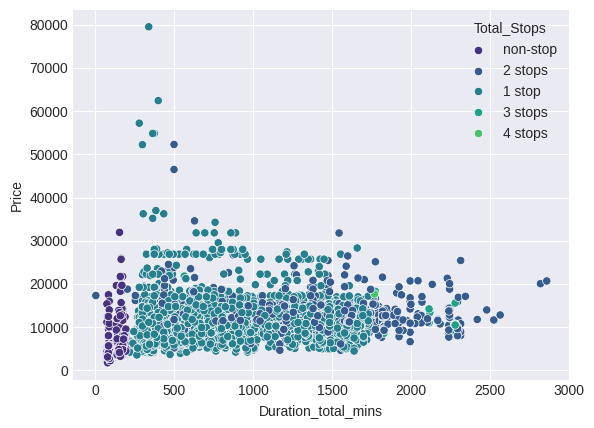

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

Feature Interactions (

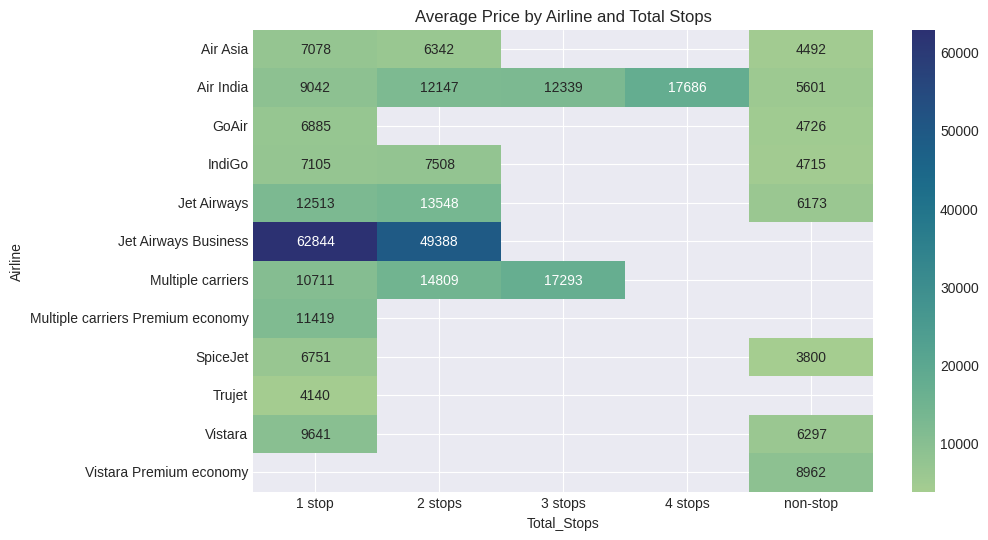

In [ ]:
# Average price by airline and total stops
avg_price = data.groupby(['Airline', 'Total_Stops'])['Price'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price, annot=True, fmt=".0f", cmap='crest')
plt.title('Average Price by Airline and Total Stops')
plt.show()

Average Price by Airline

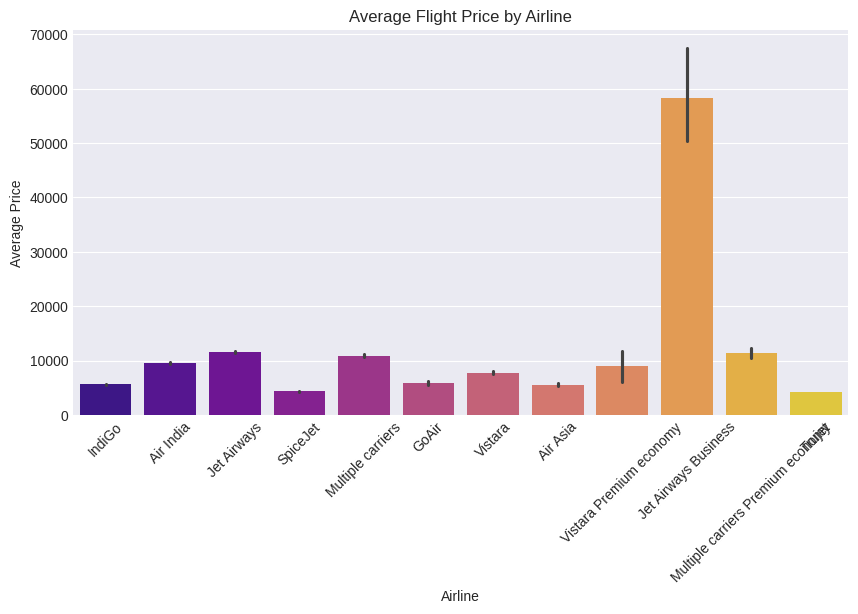

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Airline', y='Price', data=data, palette='plasma', estimator='mean')
plt.title('Average Flight Price by Airline', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

Average Price by Number of Stops

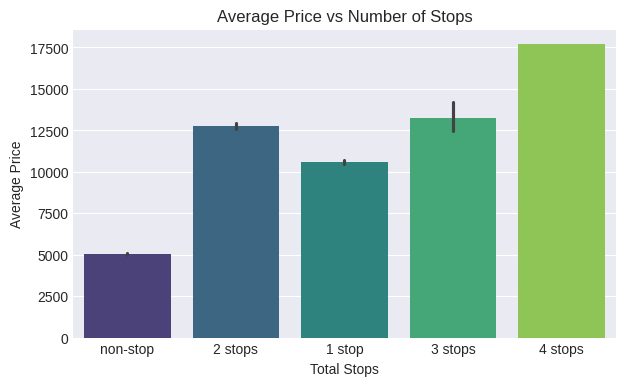

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x='Total_Stops', y='Price', data=data, palette='viridis', estimator='mean')
plt.title('Average Price vs Number of Stops', fontsize=12)
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

Average Price by Source and Destination

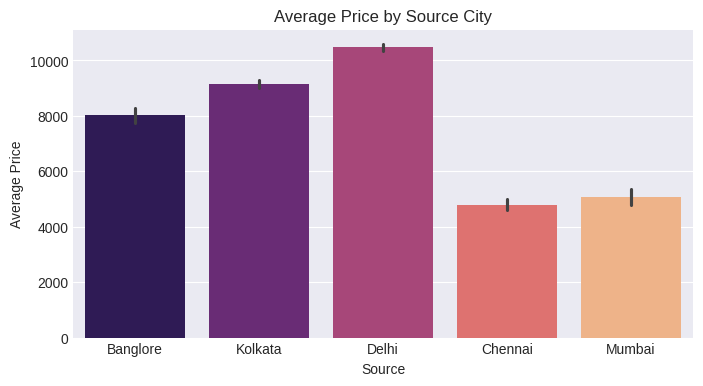

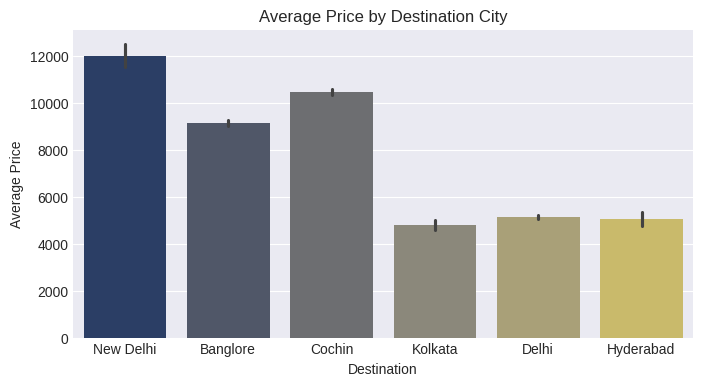

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Source', y='Price', data=data, palette='magma', estimator='mean')
plt.title('Average Price by Source City', fontsize=12)
plt.xlabel('Source')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Destination', y='Price', data=data, palette='cividis', estimator='mean')
plt.title('Average Price by Destination City', fontsize=12)
plt.xlabel('Destination')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Filter dataset for Jet Airways flights only
jet_airways = data[data['Airline'] == 'Jet Airways']

In [ ]:
# Count most frequent routes for Jet Airways
route_counts = jet_airways['Route'].value_counts().reset_index()
route_counts.columns = ['Route', 'Flight_Count']
route_counts.head(10)

,Route,Flight_Count
0,CCU → BOM → BLR,930
1,DEL → BOM → COK,875
2,BLR → BOM → DEL,385
3,BLR → DEL,381
4,CCU → DEL → BLR,300
5,BOM → HYD,207
6,DEL → JAI → BOM → COK,150
7,DEL → AMD → BOM → COK,94
8,DEL → IDR → BOM → COK,77
9,DEL → ATQ → BOM → COK,38


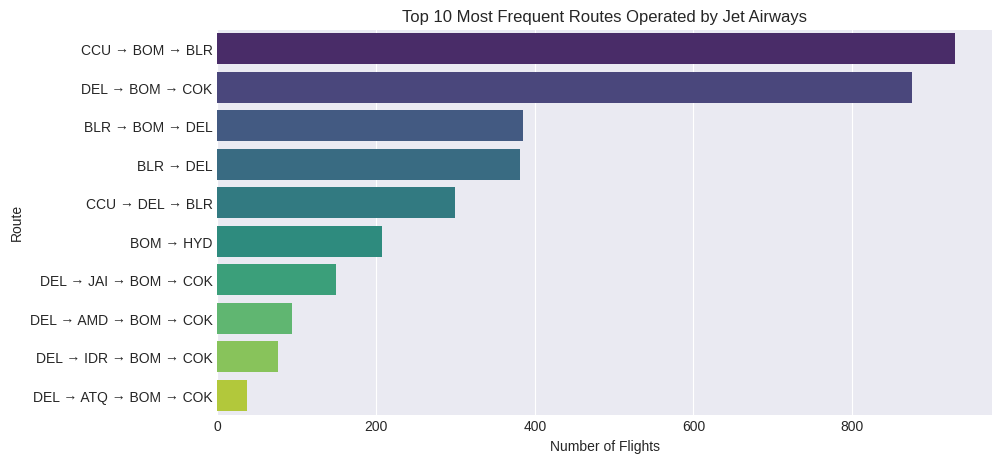

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='Flight_Count',
    y='Route',
    data=route_counts.head(10),
    palette='viridis'
)
plt.title('Top 10 Most Frequent Routes Operated by Jet Airways', fontsize=12)
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

Encoding & Mapping Categorical Variables

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_mins'],
      dtype='object')

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


In [ ]:
print(data.columns.tolist())

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes', 'Duration_total_mins']


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')

Map Total Stops

In [ ]:
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

Encode Route by Frequency

In [ ]:
route_freq = data['Route'].value_counts().to_dict()
data['Route'] = data['Route'].map(route_freq)

In [ ]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,1552.0,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,6.0,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,41.0,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,9.0,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,3.0,16:50,21:35,4h 45m,1.0,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,724.0,09:00,11:25,2h 25m,0.0,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,402.0,18:55,10:25 13 Mar,15h 30m,1.0,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,402.0,08:00,05:05 02 Mar,21h 5m,1.0,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,402.0,08:55,10:25 13 Mar,25h 30m,1.0,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,2376.0,11:25,19:15,7h 50m,1.0,No info,8625


Encode Airlines

In [ ]:
# Inspect unique categories
data['Airline'].nunique()

# 1️Compute mean price per airline and sort
data.groupby(['Airline'])['Price'].mean().sort_values()

#  Get airlines ordered by mean fare
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

# Create an ordinal mapping dictionary
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

# Map airline names to encoded integers
data['Airline'] = data['Airline'].map(dict_airlines)

Encode Destinations

In [ ]:
# Normalize inconsistent naming
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

# Get ordered destinations by mean price
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

# Create and apply mapping
dict_dest = {key:index for index , key in enumerate(dest , 0)}
data['Destination'] = data['Destination'].map(dict_dest)

In [ ]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,Banglore,2,1552.0,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,7,1/05/2019,Kolkata,3,6.0,05:50,13:15,7h 25m,2.0,No info,7662
2,10,9/06/2019,Delhi,4,41.0,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,3,12/05/2019,Kolkata,3,9.0,18:05,23:30,5h 25m,1.0,No info,6218
4,3,01/03/2019,Banglore,2,3.0,16:50,21:35,4h 45m,1.0,No info,13302
5,1,24/06/2019,Kolkata,3,724.0,09:00,11:25,2h 25m,0.0,No info,3873
6,10,12/03/2019,Banglore,2,402.0,18:55,10:25 13 Mar,15h 30m,1.0,In-flight meal not included,11087
7,10,01/03/2019,Banglore,2,402.0,08:00,05:05 02 Mar,21h 5m,1.0,No info,22270
8,10,12/03/2019,Banglore,2,402.0,08:55,10:25 13 Mar,25h 30m,1.0,In-flight meal not included,11087
9,8,27/05/2019,Delhi,4,2376.0,11:25,19:15,7h 50m,1.0,No info,8625


Feature Extraction from Date and Time

In [ ]:
import pandas as pd
import numpy as np

#  Step 1: Parse Date_of_Journey
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], dayfirst=True)
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

# Step 2: Split Departure Time
data['Dep_Time_hour'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.hour
data['Dep_Time_minute'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.minute

# Step 3: Handle Arrival
# Some arrival times contain date info like "01:10 22 Mar"
# We’ll extract time, day, and month safely.
def extract_arrival_info(value):
    parts = value.split()
    time_part = parts[0]           # e.g. '01:10'
    day = None
    month = None
    if len(parts) == 3:
        day = int(parts[1])        # e.g. '22'
        month = parts[2]           # e.g. 'Mar'
    elif len(parts) == 2:
        # Handles cases like '04:25 10' where month missing
        try:
            day = int(parts[1])
        except:
            pass

    # Extract hour/minute
    hour, minute = map(int, time_part.split(':'))
    return pd.Series([hour, minute, day, month])

data[['Arrival_Time_hour', 'Arrival_Time_minute', 'Arrival_Day', 'Arrival_Month']] = data['Arrival_Time'].apply(extract_arrival_info)

# Optional: convert month names to numeric
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
             'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
data['Arrival_Month'] = data['Arrival_Month'].map(month_map)

#  Step 4: Duration (convert to total minutes)
def duration_to_minutes(x):
    x = x.replace('h', ' ').replace('m', ' ')
    parts = x.split()
    if len(parts) == 2:  # e.g., '2h 50m'
        hours, mins = map(int, parts)
    elif len(parts) == 1:  # only hours or only minutes
        if 'h' in x:
            hours, mins = int(parts[0]), 0
        else:
            hours, mins = 0, int(parts[0])
    else:
        hours, mins = 0, 0
    return hours*60 + mins

data['Duration_total_mins'] = data['Duration'].apply(duration_to_minutes)
data['Duration_hours'] = data['Duration_total_mins'] // 60
data['Duration_minutes'] = data['Duration_total_mins'] % 60

# Step 5: Drop redundant/unnecessary columns
data.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Route'], inplace=True, errors='ignore')

# Step 6: Handle categorical columns
# Airline, Source, Destination — use target guided or one-hot
# Example (if already encoded Airline/Destination as numeric earlier, skip this)
# data = pd.get_dummies(data, columns=['Source'], drop_first=True)

#  Step 7: Final check
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  int64  
 1   Source               10683 non-null  object 
 2   Destination          10683 non-null  int64  
 3   Total_Stops          10682 non-null  float64
 4   Price                10683 non-null  int64  
 5   Journey_Day          10683 non-null  int32  
 6   Journey_Month        10683 non-null  int32  
 7   Journey_Year         10683 non-null  int32  
 8   Dep_Time_hour        10683 non-null  int32  
 9   Dep_Time_minute      10683 non-null  int32  
 10  Arrival_Time_hour    10683 non-null  float64
 11  Arrival_Time_minute  10683 non-null  float64
 12  Arrival_Day          4335 non-null   float64
 13  Arrival_Month        4335 non-null   float64
 14  Duration_total_mins  10683 non-null  int64  
 15  Duration_hours       10683 non-null 

In [ ]:
print(data.columns.tolist())

['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Arrival_Day', 'Arrival_Month', 'Duration_total_mins', 'Duration_hours', 'Duration_minutes']


Airline Fare Prediction: Feature Engineering

Low Variance Feature Check and  Multicollinearity check

Low variance columns: []


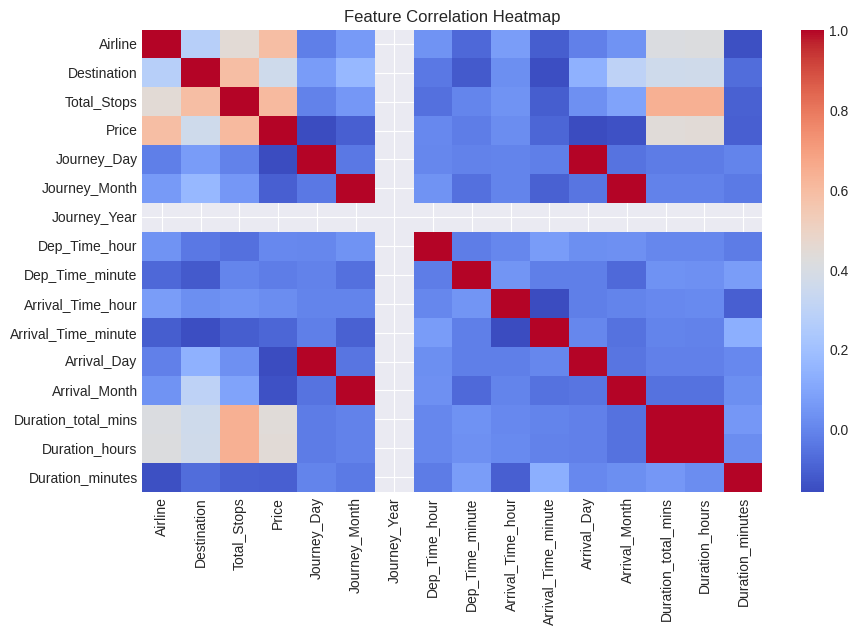

In [ ]:
# Low variance check
low_variance = data.describe(include='all').T
low_variance = low_variance[low_variance['unique'] == 1]
print("Low variance columns:", low_variance.index.tolist())

# Multicollinearity check (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Day,Arrival_Month,Duration_total_mins,Duration_hours,Duration_minutes
0,3,Banglore,2,0.0,3897,24,3,2019,22,20,1.0,10.0,22.0,3.0,170,2,50
1,7,Kolkata,3,2.0,7662,1,5,2019,5,50,13.0,15.0,NaN,NaN,445,7,25
2,10,Delhi,4,2.0,13882,9,6,2019,9,25,4.0,25.0,10.0,6.0,19,0,19


In [ ]:
data['Arrival_Day'].fillna(data['Journey_Day'], inplace=True)
data['Arrival_Month'].fillna(data['Journey_Month'], inplace=True)

In [ ]:
data.head(10)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Day,Arrival_Month,Duration_total_mins,Duration_hours,Duration_minutes
0,3,Banglore,2,0.0,3897,24,3,2019,22,20,1.0,10.0,22.0,3.0,170,2,50
1,7,Kolkata,3,2.0,7662,1,5,2019,5,50,13.0,15.0,1.0,5.0,445,7,25
2,10,Delhi,4,2.0,13882,9,6,2019,9,25,4.0,25.0,10.0,6.0,19,0,19
3,3,Kolkata,3,1.0,6218,12,5,2019,18,5,23.0,30.0,12.0,5.0,325,5,25
4,3,Banglore,2,1.0,13302,1,3,2019,16,50,21.0,35.0,1.0,3.0,285,4,45
5,1,Kolkata,3,0.0,3873,24,6,2019,9,0,11.0,25.0,24.0,6.0,145,2,25
6,10,Banglore,2,1.0,11087,12,3,2019,18,55,10.0,25.0,13.0,3.0,930,15,30
7,10,Banglore,2,1.0,22270,1,3,2019,8,0,5.0,5.0,2.0,3.0,1265,21,5
8,10,Banglore,2,1.0,11087,12,3,2019,8,55,10.0,25.0,13.0,3.0,1530,25,30
9,8,Delhi,4,1.0,8625,27,5,2019,11,25,19.0,15.0,27.0,5.0,470,7,50


# **Encoding Categorical Features**



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = ['Source', 'Destination']
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Drop redundant features if any
data.drop(columns=['Duration_hours', 'Duration_minutes'], inplace=True)

#  Handle missing values
data.fillna(0, inplace=True)  # or use median/mode if you have some NaNs

#  Separate features and target
X = data.drop(columns=['Price'])
y = data['Price']

In [ ]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Day,Arrival_Month,Duration_total_mins
0,3,0,2,0.0,3897,24,3,2019,22,20,1.0,10.0,22.0,3.0,170
1,7,3,3,2.0,7662,1,5,2019,5,50,13.0,15.0,1.0,5.0,445
2,10,2,4,2.0,13882,9,6,2019,9,25,4.0,25.0,10.0,6.0,19


# **Outlier Detection**

Before IQR cleaning: 10683 rows
After IQR cleaning: 10511 rows

Before Isolation Forest cleaning: 10683 rows
After Isolation Forest cleaning: 10469 rows


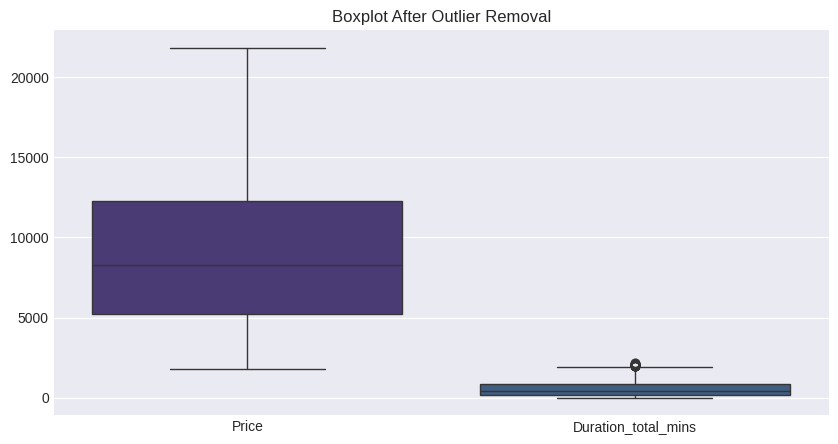


 Outlier Summary per Column (IQR Method):
                Column  Outliers  Percent
0                Price        94     0.88
1  Duration_total_mins        79     0.74

Total outliers detected across selected columns: 173


In [ ]:
# Outlier Detection: IQR & Isolation Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Function: IQR-based outlier removal
def iqr_outlier_removal(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Specify numeric columns (avoid categorical or encoded binary)
continuous_cols = ['Price', 'Duration_total_mins']

#  Apply IQR Cleaning
df_iqr_clean = iqr_outlier_removal(data, continuous_cols)

print(f"Before IQR cleaning: {data.shape[0]} rows")
print(f"After IQR cleaning: {df_iqr_clean.shape[0]} rows")

# Apply Isolation Forest (Optional Multivariate Detection)
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_pred = iso.fit_predict(data[continuous_cols])

data['Outlier'] = outlier_pred
df_iso_clean = data[data['Outlier'] == 1]  # -1 = outlier, 1 = normal

print(f"\nBefore Isolation Forest cleaning: {data.shape[0]} rows")
print(f"After Isolation Forest cleaning: {df_iso_clean.shape[0]} rows")

# Visualize After Cleaning
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_iso_clean[continuous_cols])
plt.title("Boxplot After Outlier Removal")
plt.show()

# Outlier Count Summary (IQR-based)
print("\n Outlier Summary per Column (IQR Method):")
summary = []
for col in continuous_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    count = outliers.shape[0]
    percent = (count / data.shape[0]) * 100
    summary.append({'Column': col, 'Outliers': count, 'Percent': round(percent, 2)})

# Convert summary to DataFrame for cleaner output
outlier_summary = pd.DataFrame(summary)
print(outlier_summary)

# If you want to print the total outliers in the dataset
total_outliers = outlier_summary['Outliers'].sum()
print(f"\nTotal outliers detected across selected columns: {total_outliers}")

Visualize Distributions of Key Features

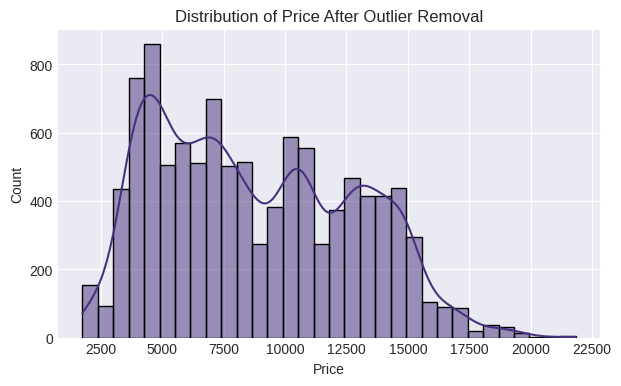

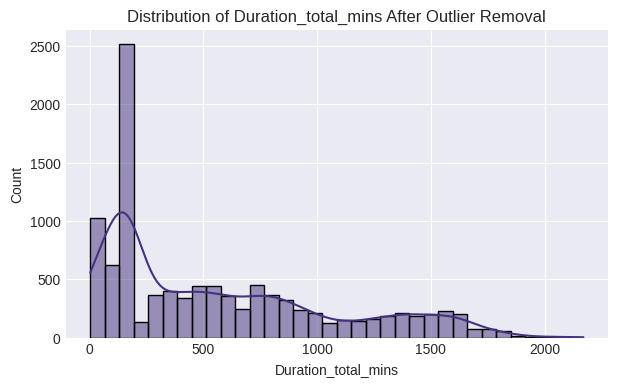

In [ ]:
for col in ['Price', 'Duration_total_mins']:
    plt.figure(figsize=(7,4))
    sns.histplot(df_iso_clean[col], kde=True)
    plt.title(f"Distribution of {col} After Outlier Removal")
    plt.show()

# **Log Transformation of Skewed Features**




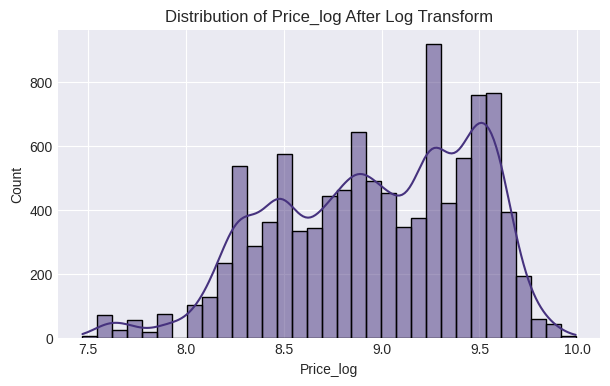

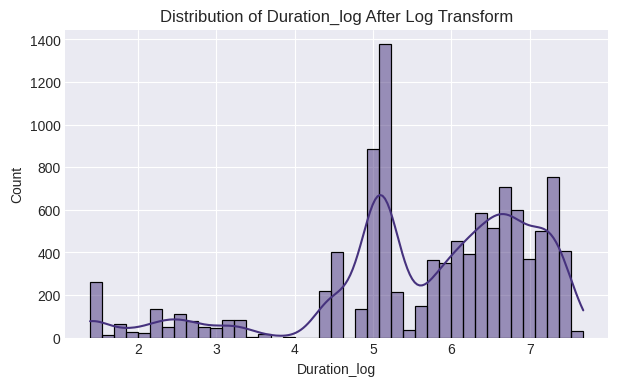

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Log-transform to handle skew
df_transformed = df_iso_clean.copy()
df_transformed['Price_log'] = np.log1p(df_transformed['Price'])
df_transformed['Duration_log'] = np.log1p(df_transformed['Duration_total_mins'])

# Visualize again
for col in ['Price_log', 'Duration_log']:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_transformed[col], kde=True)
    plt.title(f"Distribution of {col} After Log Transform")
    plt.show()

# **Feature Selection for Flight Fare Prediction**

Total features after encoding: 14


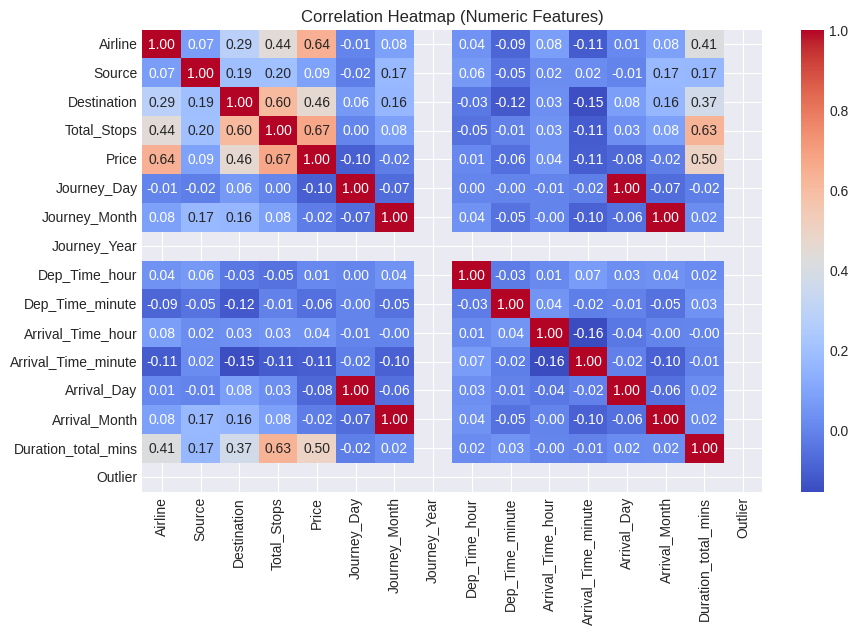

Highly correlated features (drop candidates): ['Arrival_Day', 'Arrival_Month']


In [ ]:
# Feature Selection for Flight Fare Prediction
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your cleaned dataset
df = df_iso_clean.copy()

# Target variable
y = df['Price']

# Select potential predictors (exclude target)
X = df.drop(columns=['Price', 'Outlier'], errors='ignore')

# Encode categorical variables (if not already encoded)
X = pd.get_dummies(X, drop_first=True)

print(f"Total features after encoding: {X.shape[1]}")

# Correlation Check for Numeric Features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Drop features with high multicollinearity (correlation > 0.9)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper_tri.columns if any(upper_tri[column].abs() > 0.9)]

print("Highly correlated features (drop candidates):", high_corr)

X = X.drop(columns=high_corr, errors='ignore')

# **Random Forest Regression**

In [ ]:
#  Random Forest Regression
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final dataset is called df_iso_clean
# and 'Price' is your target variable
# X = df_iso_clean.drop('Price', axis=1) # X and y are already created in the feature selection step
# y = df_iso_clean['Price'] # X and y are already created in the feature selection step

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

 Basic Evaluation Metrics:
MAE  : 1174.87
MSE  : 3209028.03
RMSE : 1791.38
R²   : 0.7960

 5-Fold Cross-Validation R² Scores:
[0.81826562 0.8191139  0.82818463 0.80707171 0.80706825]
Mean R²: 0.8159 | Std: 0.0080


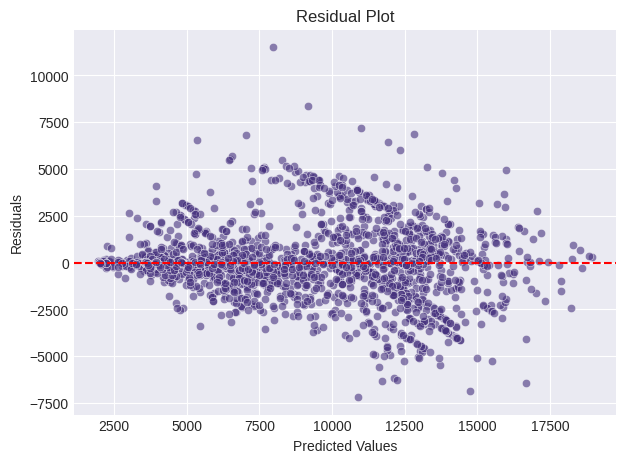

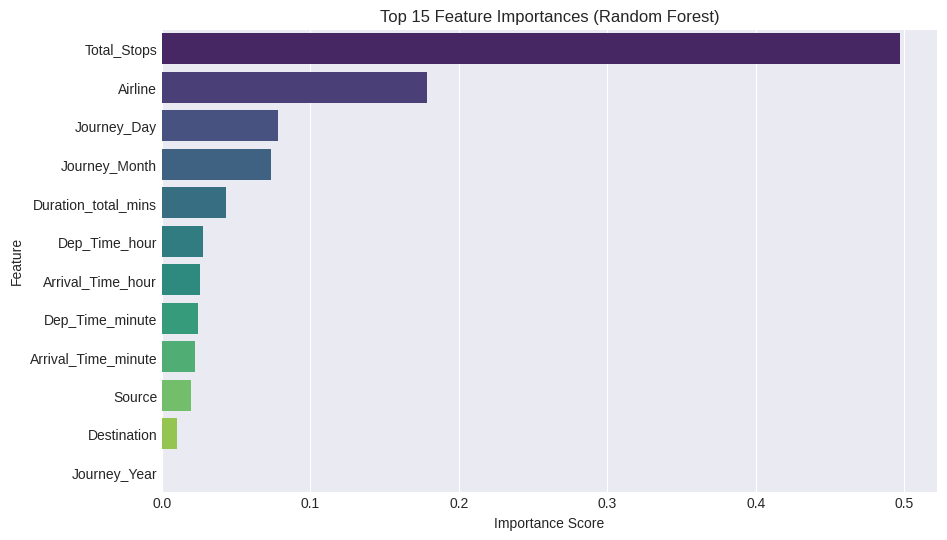

In [ ]:
# Basic Evaluation

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Basic Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

# Advanced Evaluation

# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("\n 5-Fold Cross-Validation R² Scores:")
print(cv_scores)
print(f"Mean R²: {cv_scores.mean():.4f} | Std: {cv_scores.std():.4f}")

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## **Evaluation Metrics**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Smaller, smarter parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Faster RandomizedSearch
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,               # ↓ Try only 10 random combos
    scoring='r2',
    cv=3,                    # ↓ Use 3 folds instead of 5
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_
print("Best Parameters:", rf_random_search.best_params_)

# Evaluate tuned model
y_pred_best = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print("\n Tuned Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}

 Tuned Model Performance:
MAE  : 1212.22
MSE  : 2864706.76
RMSE : 1692.54
R²   : 0.8179


##**SHAP Explainability**

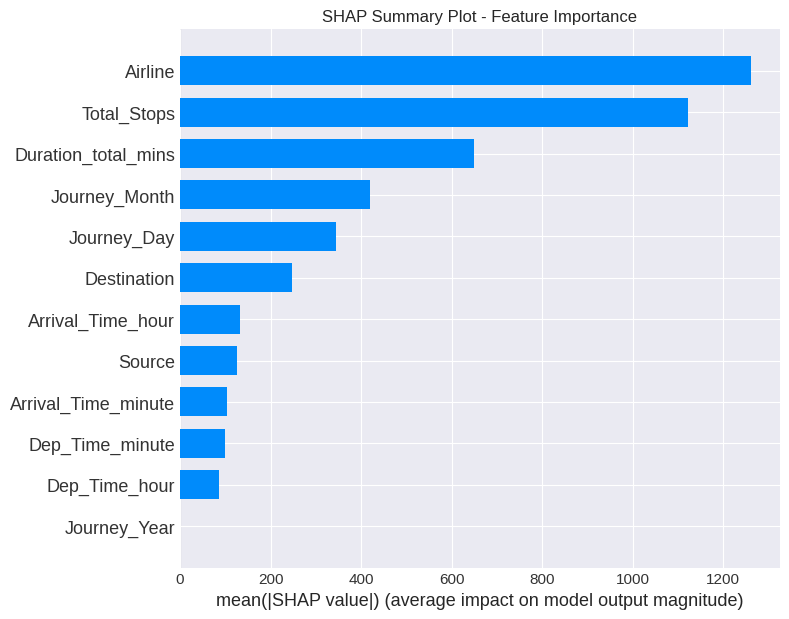

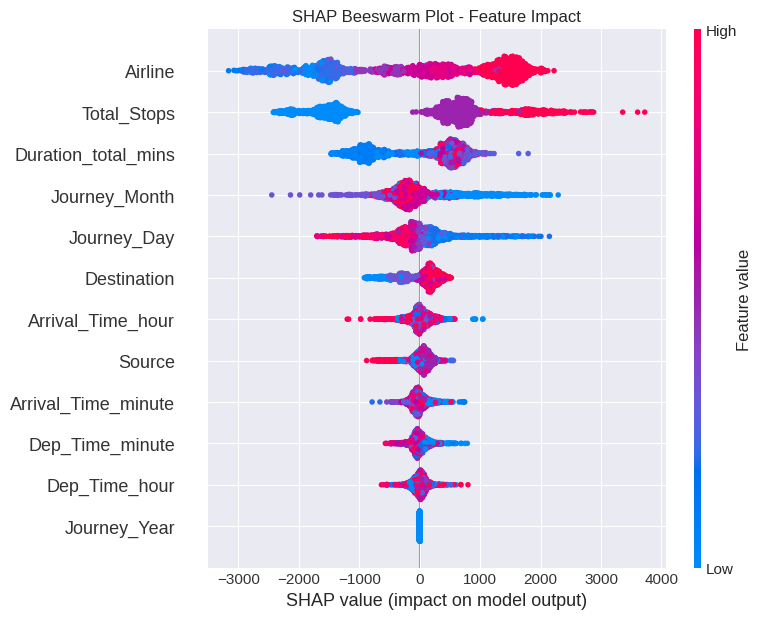

In [ ]:
# SHAP Explainability

# Use the tuned Random Forest model
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values
# For regression models, shap_values directly returns the array
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance - Bar)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - Feature Importance")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Detailed SHAP Summary (Beeswarm) - Shows impact and direction
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Beeswarm Plot - Feature Impact")
plt.tight_layout() # Adjust layout
plt.show()

# Optional: Explain a single prediction using Force Plot
# Requires Javascript initialization for interactive plot in some environments
shap.initjs()
sample_index = 0 # Change this index to explain a different prediction

# Use the expected value from the explainer
expected_value = explainer.expected_value

# Ensure shap_values is a 2D array for the force plot
shap.force_plot(
    expected_value,
    shap_values[sample_index],
    X_test.iloc[sample_index, :],
    matplotlib=False # Set to False for interactive JS plot
)

# **XGBOOST**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# --- Basic Evaluation ---
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print(" Basic Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

 Basic Evaluation Metrics:
MAE  : 1148.49
MSE  : 2987492.00
RMSE : 1728.44
R²   : 0.8101


##**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation on R²
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print("\n 5-Fold Cross-Validation R² Scores:")
print(cv_scores)
print(f"Mean R²: {cv_scores.mean():.4f} | Std: {cv_scores.std():.4f}")


 5-Fold Cross-Validation R² Scores:
[0.82073808 0.81965256 0.82893509 0.82272142 0.84338796]
Mean R²: 0.8271 | Std: 0.0088


Evaluation Metrics

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=15,              # keep light
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print("Best Parameters:", xgb_search.best_params_)

# Evaluate tuned XGB model
y_pred_tuned = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

print("\n Tuned XGBoost Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

 Tuned XGBoost Performance:
MAE  : 1133.61
MSE  : 2497318.00
RMSE : 1580.29
R²   : 0.8413


## **Feature Importance**

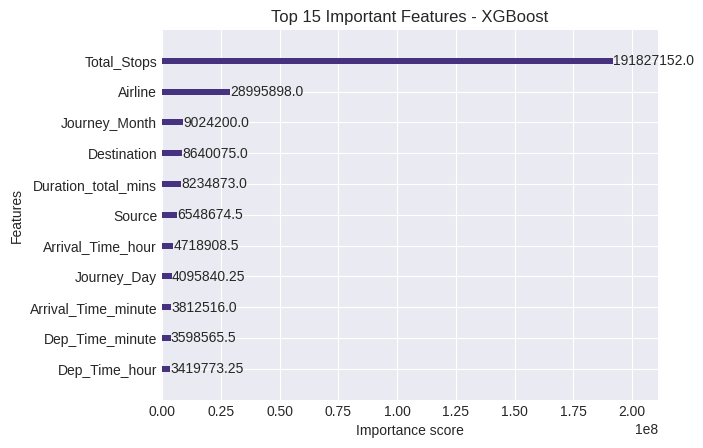

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb_lib

xgb_lib.plot_importance(xgb, importance_type='gain', max_num_features=15)
plt.title("Top 15 Important Features - XGBoost")
plt.show()

## **SHAP Explainability**

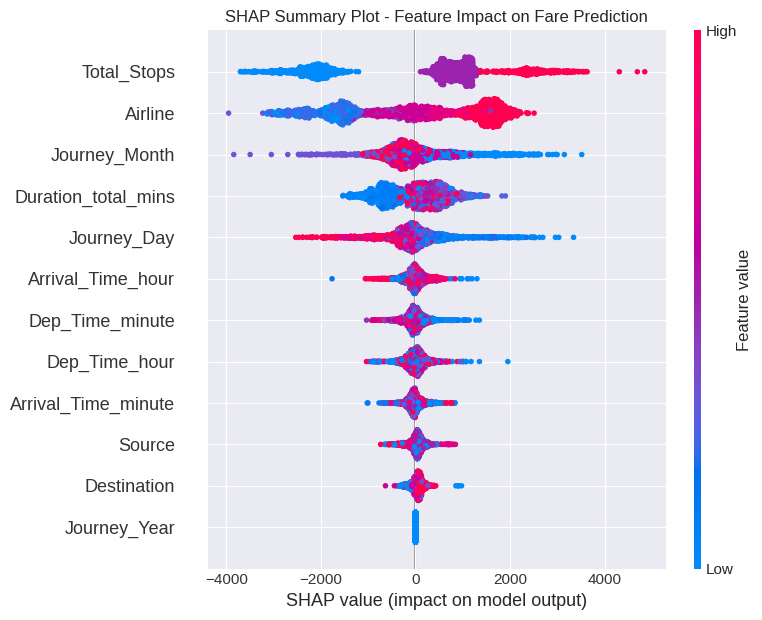

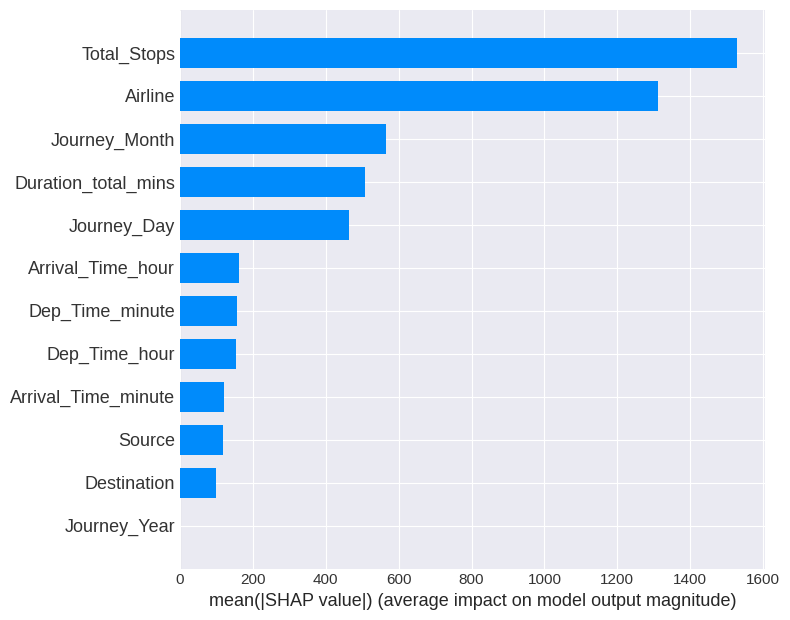


Top influencing feature: Total_Stops


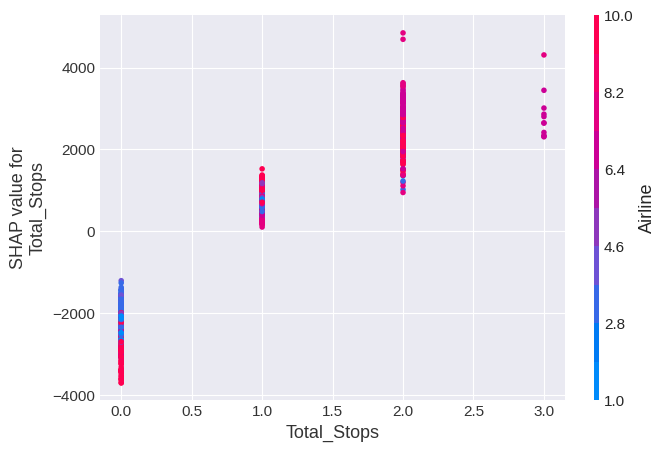

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

#  SHAP Summary Plot
plt.title("SHAP Summary Plot - Feature Impact on Fare Prediction")
shap.summary_plot(shap_values, X_test)

#  SHAP Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

#SHAP Dependence Plot (Most Influential Feature)
top_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(axis=0))]
print(f"\nTop influencing feature: {top_feature}")
shap.dependence_plot(top_feature, shap_values, X_test)

#Optional: Force Plot for a Single Prediction
sample_idx = 5  # change to see different predictions
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx, :],
    X_test.iloc[sample_idx, :]
)

# **LIGHT GBM**

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# Train model
lgbm.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm.predict(X_test)

# --- Basic Evaluation ---
mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgbm)

print(" Basic Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 8375, number of used features: 11
[LightGBM] [Info] Start training from score 8806.466388
 Basic Evaluation Metrics:
MAE  : 1115.90
MSE  : 2433070.35
RMSE : 1559.83
R²   : 0.8453


##**Cross Validation**

In [ ]:
# 5-fold cross-validation
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print("\n 5-Fold Cross-Validation R² Scores:")
print(cv_scores)
print(f"Mean R²: {cv_scores.mean():.4f} | Std: {cv_scores.std():.4f}")



 5-Fold Cross-Validation R² Scores:
[0.85184204 0.84968703 0.85285564 0.8420991  0.86017303]
Mean R²: 0.8513 | Std: 0.0058


##**Feature Importance**

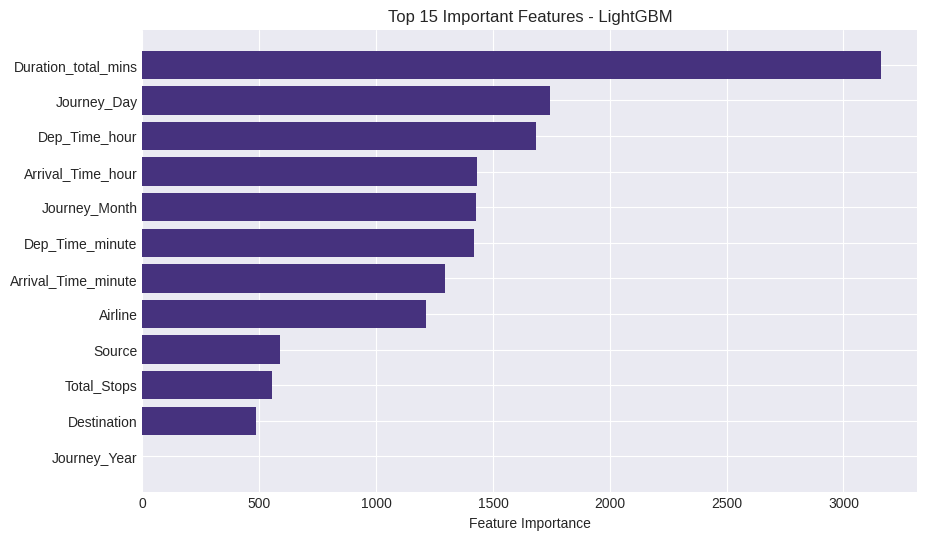

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Top 15 Important Features - LightGBM")
plt.barh(importances['Feature'][:15][::-1], importances['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.show()

## **Evaluation Metrics**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 700],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.3],
    'reg_lambda': [0.5, 1.0, 1.5]
}

lgbm_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=15,          # lightweight but effective
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

lgbm_search.fit(X_train, y_train)
best_lgbm = lgbm_search.best_estimator_

print("\nBest Parameters:", lgbm_search.best_params_)

# Evaluate tuned model
y_pred_tuned = best_lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

print("\n Tuned Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 8375, number of used features: 11
[LightGBM] [Info] Start training from score 8806.466388

Best Parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

 Tuned Model Performance:
MAE  : 1109.98
MSE  : 2411814.54
RMSE : 1553.00
R²   : 0.8467


##**SHAP Explainability**

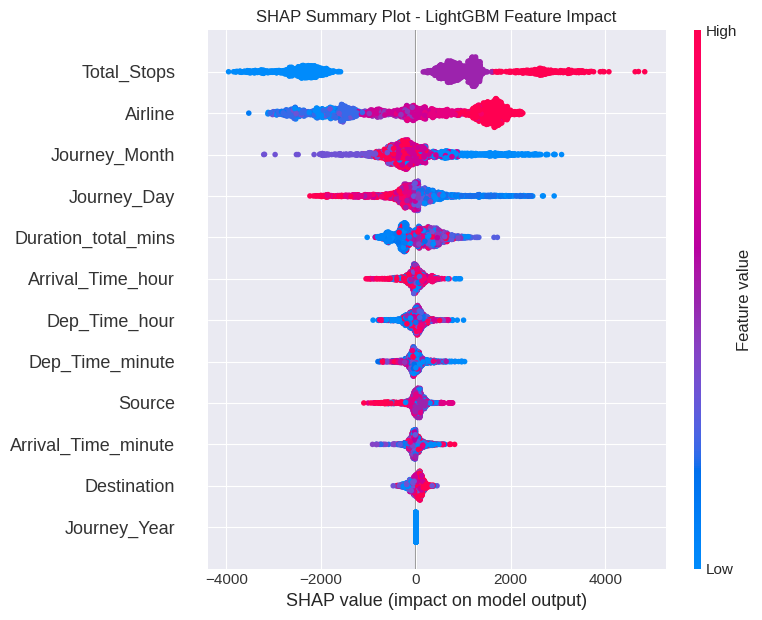

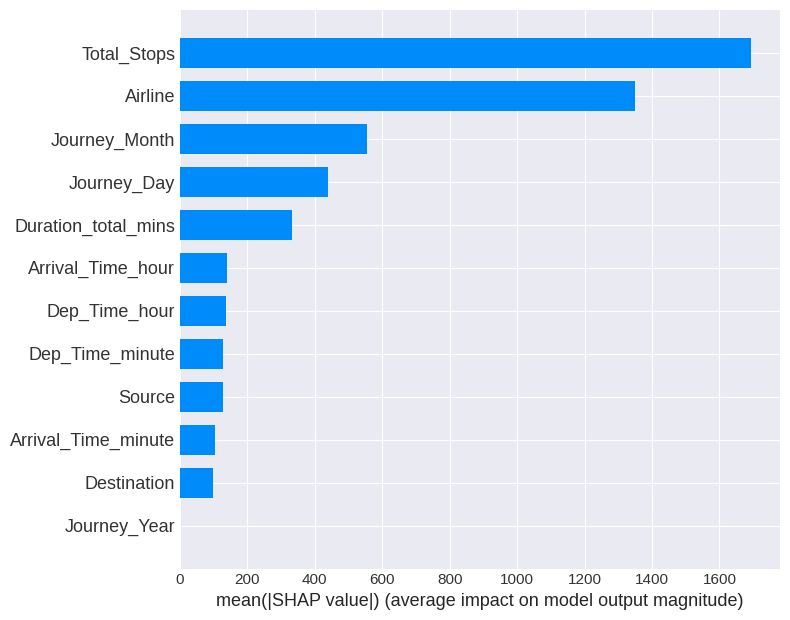


Top influencing feature: Total_Stops


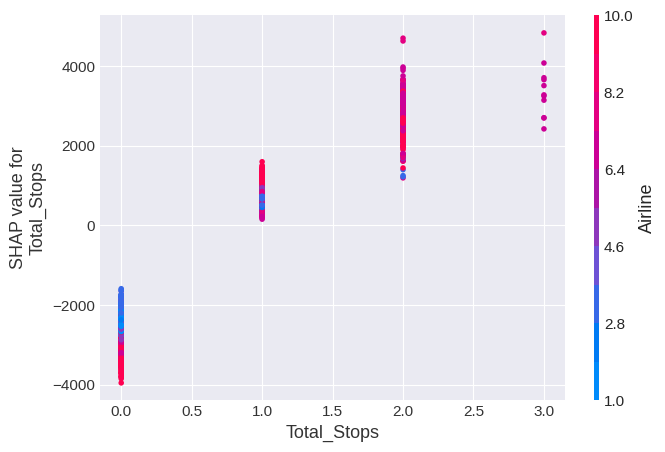

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_test)

# --- SHAP Summary Plot ---
plt.title("SHAP Summary Plot - LightGBM Feature Impact")
shap.summary_plot(shap_values, X_test)

# --- SHAP Bar Plot ---
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- SHAP Dependence Plot ---
top_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(axis=0))]
print(f"\nTop influencing feature: {top_feature}")
shap.dependence_plot(top_feature, shap_values, X_test)

# --- Optional: Force Plot (Single Prediction) ---
sample_idx = 8
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx, :],
    X_test.iloc[sample_idx, :]
)

# Model Comparison & Final Recommendation

### Overview of Tuned Models

| Model         | MAE       | MSE         | RMSE      | R²     |
|---------------|-----------|------------|-----------|--------|
| **Random Forest** | 1212.22   | 2,864,706.76 | 1692.54  | 0.8179 |
| **XGBoost**       | 1133.61   | 2,497,318.00 | 1580.29  | 0.8413 |
| **LightGBM**      | 1109.98   | 2,411,814.54 | 1553.00  | 0.8467 |



###  Metric Analysis

- **MAE (Mean Absolute Error):** average absolute difference between predicted and actual values.  
  - Lower is better.  
  -  LightGBM (1109.98) < XGBoost (1133.61) < Random Forest (1212.22)

- **RMSE (Root Mean Squared Error):** penalizes larger errors more heavily.  
  - Lower is better.  
  - LightGBM (1553.00) < XGBoost (1580.29) < Random Forest (1692.54)

- **R² (Coefficient of Determination):** indicates how well the model explains variance in the target.  
  - Higher is better (max = 1).  
  -  LightGBM (0.8467) > XGBoost (0.8413) > Random Forest (0.8179)


### Observations

1. **LightGBM** performs the best overall:
   - Lowest MAE & RMSE  
   - Highest R² → explains most variance  

2. **XGBoost** is a close second — strong performance, but slightly worse metrics.  

3. **Random Forest** performs decently but is comparatively less accurate.

**Why LightGBM excels:**  
- Gradient boosting often outperforms Random Forest on tabular data.  
- Efficient handling of categorical variables and larger datasets.  
- Lower learning rate and optimized number of leaves produce smoother, more accurate predictions.


### Final Recommendation

- **Use LightGBM as the final model** for predictions.  
- Optional: Keep XGBoost as a benchmark or for ensemble/stacking approaches.  
- Random Forest can be included for comparison but is not preferred for deployment.




# **Airline Fare Prediction: Test Data Preprocessing & Predictions**

Test data preprocessing complete.
First 5 predictions: [11495.92653443  4502.67193022 13980.34107393 10873.70843049
  4185.32348512]
Prediction range: min = 3057.1757765894354 , max = 19646.326260302092
Predictions saved successfully!


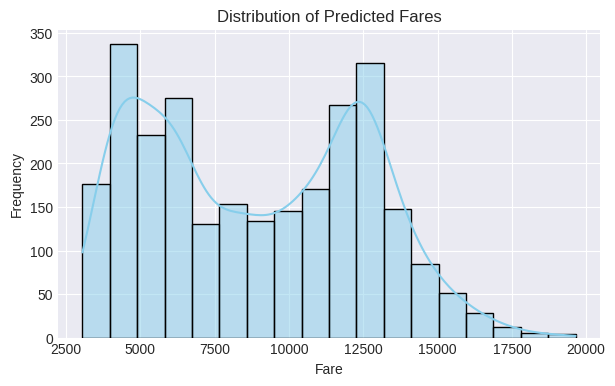

In [ ]:
# Airline Fare Prediction: Test Data Preprocessing & Predictions


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load Test Data

test_data = pd.read_excel('/content/drive/MyDrive/Test_set.xlsx')

# Apply Train Mappings / Encodings

# Total Stops
stops_mapping = {
    'non-stop': 0, '1 stop': 1, '2 stops': 2,
    '3 stops': 3, '4 stops': 4
}
test_data['Total_Stops'] = test_data['Total_Stops'].map(stops_mapping)

# Route: map train frequencies
# route_freq = data['Route'].value_counts().to_dict() from train
test_data['Route'] = test_data['Route'].map(route_freq).fillna(0)

# Airline
test_data['Airline'] = test_data['Airline'].map(dict_airlines)

# Destination
test_data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
test_data['Destination'] = test_data['Destination'].map(dict_dest)

# Source: Apply the same mapping as Destination for consistency, as Source was not ordinally encoded in train
test_data['Source'] = test_data['Source'].map(dict_dest)


#  Feature Extraction from Date & Time

# Journey
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], dayfirst=True)
test_data['Journey_Day'] = test_data['Date_of_Journey'].dt.day
test_data['Journey_Month'] = test_data['Date_of_Journey'].dt.month
test_data['Journey_Year'] = test_data['Date_of_Journey'].dt.year

# Departure Time
test_data['Dep_Time_hour'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.hour
test_data['Dep_Time_minute'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.minute

# Arrival Time
def extract_arrival_info(value):
    parts = value.split()
    time_part = parts[0]
    day, month = None, None
    if len(parts) == 3:
        day = int(parts[1])
        month = parts[2]
    elif len(parts) == 2:
        try:
            day = int(parts[1])
        except:
            pass
    hour, minute = map(int, time_part.split(':'))
    return pd.Series([hour, minute, day, month])

test_data[['Arrival_Time_hour','Arrival_Time_minute','Arrival_Day','Arrival_Month']] = \
    test_data['Arrival_Time'].apply(extract_arrival_info)

# Map month names to numbers
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
             'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
test_data['Arrival_Month'] = test_data['Arrival_Month'].map(month_map)

# Duration
def duration_to_minutes(x):
    if not isinstance(x, str):
        return 0
    x = x.replace('h',' ').replace('m',' ')
    parts = x.split()
    if len(parts)==2:
        try: hours, mins = map(int, parts)
        except: hours, mins = 0, 0
    elif len(parts)==1:
        try:
            if 'h' in x: hours, mins = int(parts[0]), 0
            else: hours, mins = 0, int(parts[0])
        except: hours, mins = 0, 0
    else:
        hours, mins = 0, 0
    return hours*60 + mins

test_data['Duration_total_mins'] = test_data['Duration'].apply(duration_to_minutes)

# Drop redundant columns
drop_cols = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','Route']
test_data.drop(columns=drop_cols, inplace=True, errors='ignore')

# Remove redundant LabelEncoder transformations as mapping was already applied
# test_data['Source'] = le_source.transform(test_data['Source'])
# test_data['Destination'] = le_dest.transform(test_data['Destination'])


#  Handle Missing Values

test_data['Arrival_Day'].fillna(test_data['Journey_Day'], inplace=True)
test_data['Arrival_Month'].fillna(test_data['Journey_Month'], inplace=True)
test_data.fillna(0, inplace=True)


# Align Test Columns with Train

missing_cols = set(X_train.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0
test_data = test_data[X_train.columns]

# Predict Using Trained Model

y_test_pred = best_lgbm.predict(test_data)  # or rf.predict(test_data) if using RF

# If target was log-transformed during train:
# y_test_pred = np.expm1(y_test_pred)

print("Test data preprocessing complete.")
print("First 5 predictions:", y_test_pred[:5])
print("Prediction range: min =", y_test_pred.min(), ", max =", y_test_pred.max())


#  Save Predictions

submission = pd.DataFrame({'Predicted_Fare': y_test_pred})
submission.to_csv('/content/drive/MyDrive/Airline_Fare_Predictions.csv', index=False)
print("Predictions saved successfully!")


# Optional: Visualize Predictions

plt.figure(figsize=(7,4))
sns.histplot(y_test_pred, kde=True, color='skyblue')
plt.title('Distribution of Predicted Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Inspect unique values in test_data['Total_Stops'] before mapping
print("Unique values in test_data['Total_Stops'] before mapping:")
print(test_data['Total_Stops'].unique())

# Print the stops_mapping dictionary
print("\nStops mapping used:")
print(stops_mapping)

# Check for NaNs in test_data['Total_Stops'] after mapping
# Note: The current test_data dataframe already had the mapping applied in the previous failed execution.
# We'll reload the test data or re-apply the mapping to check for NaNs correctly.
# For now, let's check for NaNs in the current test_data.
print("\nNumber of NaNs in test_data['Total_Stops'] after mapping:")
print(test_data['Total_Stops'].isnull().sum())

# Display rows with NaN Total_Stops (if any)
if test_data['Total_Stops'].isnull().sum() > 0:
    print("\nRows with NaN in Total_Stops:")
    display(test_data[test_data['Total_Stops'].isnull()].head())

Unique values in test_data['Total_Stops'] before mapping:
[1 0 2 3 4]

Stops mapping used:
{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

Number of NaNs in test_data['Total_Stops'] after mapping:
0


In [ ]:

# Airline Fare Prediction: Test Data Preprocessing & Predictions


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load Test Data

test_data = pd.read_excel('/content/drive/MyDrive/Test_set.xlsx')


In [ ]:
# Apply Train Mappings / Encodings

# Total Stops
stops_mapping = {
    'non-stop': 0, '1 stop': 1, '2 stops': 2,
    '3 stops': 3, '4 stops': 4
}
test_data['Total_Stops'] = test_data['Total_Stops'].map(stops_mapping)

# Route: map train frequencies
# route_freq = data['Route'].value_counts().to_dict() from train
test_data['Route'] = test_data['Route'].map(route_freq).fillna(0)

# Airline
test_data['Airline'] = test_data['Airline'].map(dict_airlines)

# Destination
test_data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
test_data['Destination'] = test_data['Destination'].map(dict_dest)

In [ ]:
#  Feature Extraction from Date & Time

# Journey
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], dayfirst=True)
test_data['Journey_Day'] = test_data['Date_of_Journey'].dt.day
test_data['Journey_Month'] = test_data['Date_of_Journey'].dt.month
test_data['Journey_Year'] = test_data['Date_of_Journey'].dt.year

# Departure Time
test_data['Dep_Time_hour'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.hour
test_data['Dep_Time_minute'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.minute

# Arrival Time
def extract_arrival_info(value):
    parts = value.split()
    time_part = parts[0]
    day, month = None, None
    if len(parts) == 3:
        day = int(parts[1])
        month = parts[2]
    elif len(parts) == 2:
        try:
            day = int(parts[1])
        except:
            pass
    hour, minute = map(int, time_part.split(':'))
    return pd.Series([hour, minute, day, month])

test_data[['Arrival_Time_hour','Arrival_Time_minute','Arrival_Day','Arrival_Month']] = \
    test_data['Arrival_Time'].apply(extract_arrival_info)

# Map month names to numbers
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
             'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
test_data['Arrival_Month'] = test_data['Arrival_Month'].map(month_map)

# Duration
def duration_to_minutes(x):
    if not isinstance(x, str):
        return 0
    x = x.replace('h',' ').replace('m',' ')
    parts = x.split()
    if len(parts)==2:
        try: hours, mins = map(int, parts)
        except: hours, mins = 0, 0
    elif len(parts)==1:
        try:
            if 'h' in x: hours, mins = int(parts[0]), 0
            else: hours, mins = 0, int(parts[0])
        except: hours, mins = 0, 0
    else:
        hours, mins = 0, 0
    return hours*60 + mins

test_data['Duration_total_mins'] = test_data['Duration'].apply(duration_to_minutes)

# Drop redundant columns
drop_cols = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','Route']
test_data.drop(columns=drop_cols, inplace=True, errors='ignore')

In [ ]:
# Encode Categorical Features (Train LabelEncoders)

# Assuming you saved train LabelEncoders or fit on train already
# le_source = LabelEncoder(); le_source.fit(data['Source'])
# le_dest = LabelEncoder(); le_dest.fit(data['Destination'])

# These lines were causing the error and are redundant as encoding was done earlier
# test_data['Source'] = le_source.transform(test_data['Source'])
# test_data['Destination'] = le_dest.transform(test_data['Destination'])

#  Handle Missing Values

test_data['Arrival_Day'].fillna(test_data['Journey_Day'], inplace=True)
test_data['Arrival_Month'].fillna(test_data['Journey_Month'], inplace=True)
test_data.fillna(0, inplace=True)

In [ ]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Day,Arrival_Month,Duration_total_mins,Outlier
0,3,0,2,0.0,3897,24,3,2019,22,20,1.0,10.0,22.0,3.0,170,1
1,7,3,3,2.0,7662,1,5,2019,5,50,13.0,15.0,1.0,5.0,445,1
2,10,2,4,2.0,13882,9,6,2019,9,25,4.0,25.0,10.0,6.0,19,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your features and target are X and y
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train your model (e.g., Random Forest)
rf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf.predict(X_val)

# Compute metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Validation Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Validation Performance:
MAE: 1180.39, RMSE: 1798.95, R²: 0.7943


 Test data predictions complete.
First 5 predictions: [10700.394       4288.35666667 14641.61257143 12353.56833333
  3814.05      ]
Prediction range: min = 3184.7533333333336 , max = 20346.33
 Predictions saved successfully!


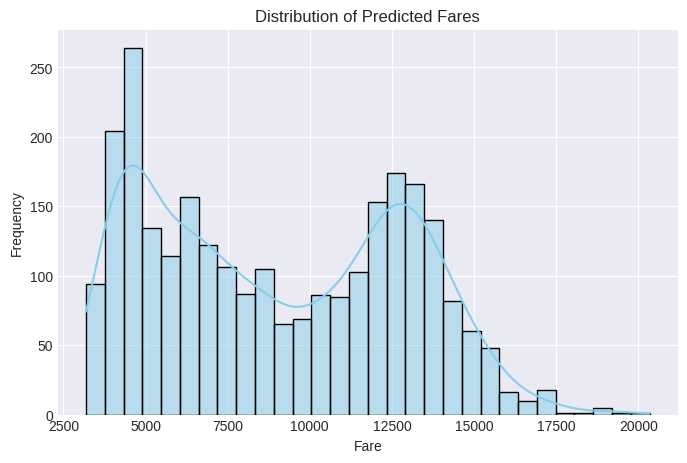

In [ ]:
# Test Set Predictions & Visualization


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_test_pred = rf.predict(test_data)  # or best_lgbm.predict(test_data) if using LightGBM

# Optional: if target was log-transformed during training
# y_test_pred = np.expm1(y_test_pred)

# Show basic stats
print(" Test data predictions complete.")
print("First 5 predictions:", y_test_pred[:5])
print("Prediction range: min =", y_test_pred.min(), ", max =", y_test_pred.max())

# Save predictions to CSV (add identifier if available)
submission = pd.DataFrame({
    'Predicted_Fare': y_test_pred
})
submission.to_csv('/content/drive/MyDrive/Airline_Fare_Predictions.csv', index=False)
print(" Predictions saved successfully!")

# Visualization: Distribution of predicted fares
plt.figure(figsize=(8,5))
sns.histplot(y_test_pred, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Predicted Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming test_data has an 'ID' or some identifier column
# submission = pd.DataFrame({
#     'ID': test_data['ID'],  # or index if no ID
#     'Predicted_Fare': y_test_pred
# })

# Create submission DataFrame with just the predicted fares
submission = pd.DataFrame({
    'Predicted_Fare': y_test_pred
})


# Save to CSV
submission.to_csv('/content/drive/MyDrive/Airline_Fare_Predictions.csv', index=False)
print(" Predictions saved successfully!")

 Predictions saved successfully!


In [ ]:
print("Lowest fares:\n", np.sort(y_test_pred)[:5])
print("Highest fares:\n", np.sort(y_test_pred)[-5:])

Lowest fares:
 [3184.75333333 3475.61       3480.02       3484.39833333 3511.368     ]
Highest fares:
 [19033.48 19085.78 19192.38 19298.1  20346.33]


In [ ]:
test_data['Predicted_Fare'] = y_test_pred

In [ ]:
airline_summary = test_data.groupby('Airline')['Predicted_Fare'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='mean', ascending=False)
print(airline_summary)

                 mean        median           min           max  count
Airline                                                               
9        11470.672444  11481.204833  10774.134167  12156.678333      3
10       11454.367602  12451.435000   3184.753333  19085.780000    897
8        11010.717321  10363.500000   6039.590000  20346.330000    347
7         9899.036312  10418.680000   4233.025000  16528.510000    440
11        9758.151667   9758.151667   6209.080000  13307.223333      2
5         7227.569066   6473.590000   3844.650000  13116.920000    129
3         5833.690413   5342.980000   3621.510000  14816.420000    511
2         5619.117179   5134.785000   3750.400000   9745.120000     86
4         5536.064116   5253.655000   3618.480000   9635.460000     46
6         5405.976310   5405.976310   4245.005000   6566.947619      2
1         4527.919237   3914.173917   3475.610000  10863.920000    208


In [ ]:
top_fares = test_data.sort_values(by='Predicted_Fare', ascending=False).head(5)
print(top_fares[['Airline','Source','Destination','Predicted_Fare']])

      Airline  Source  Destination  Predicted_Fare
214         8     2.0            4        20346.33
2487        8     2.0            4        19298.10
875         8     2.0            4        19192.38
1593       10     2.0            4        19085.78
2158       10     2.0            4        19033.48


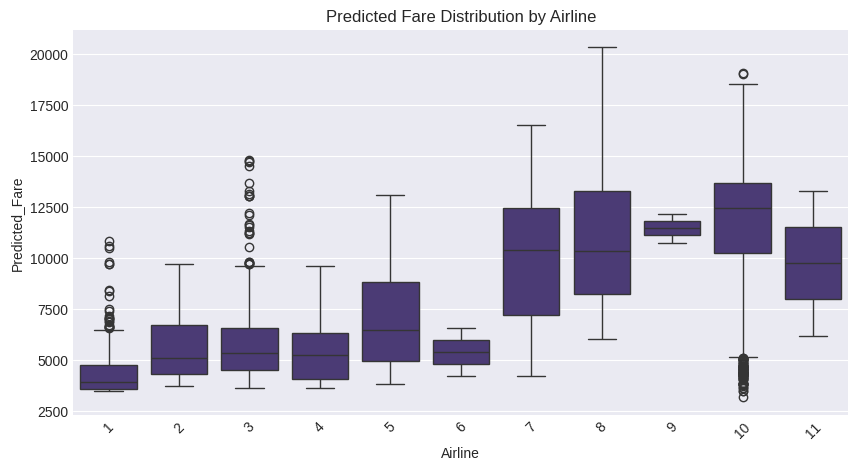

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='Airline', y='Predicted_Fare', data=test_data)
plt.xticks(rotation=45)
plt.title('Predicted Fare Distribution by Airline')
plt.show()

In [ ]:
destination_summary = test_data.groupby('Destination')['Predicted_Fare'].mean().sort_values(ascending=False)
print(destination_summary.head(5))

Destination
4    10520.048293
3     9236.978622
2     7134.726450
1     6449.022368
0     4609.118433
Name: Predicted_Fare, dtype: float64


=== Airline Fare Summary ===
                 mean        median           min           max  count
Airline                                                               
9        11470.672444  11481.204833  10774.134167  12156.678333      3
10       11454.367602  12451.435000   3184.753333  19085.780000    897
8        11010.717321  10363.500000   6039.590000  20346.330000    347
7         9899.036312  10418.680000   4233.025000  16528.510000    440
11        9758.151667   9758.151667   6209.080000  13307.223333      2
5         7227.569066   6473.590000   3844.650000  13116.920000    129
3         5833.690413   5342.980000   3621.510000  14816.420000    511
2         5619.117179   5134.785000   3750.400000   9745.120000     86
4         5536.064116   5253.655000   3618.480000   9635.460000     46
6         5405.976310   5405.976310   4245.005000   6566.947619      2
1         4527.919237   3914.173917   3475.610000  10863.920000    208

=== Top 5 Most Expensive Predicted Fares ===
  

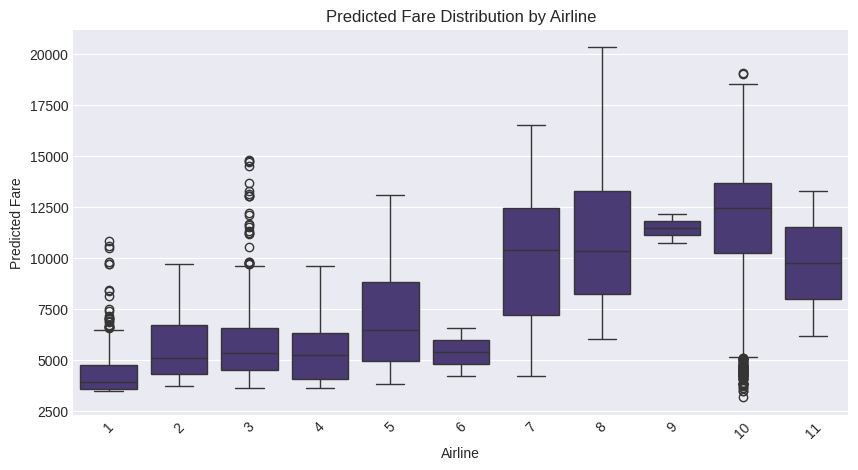


=== Top 5 Destinations by Average Predicted Fare ===
Destination
4    10520.048293
3     9236.978622
2     7134.726450
1     6449.022368
0     4609.118433
Name: Predicted_Fare, dtype: float64


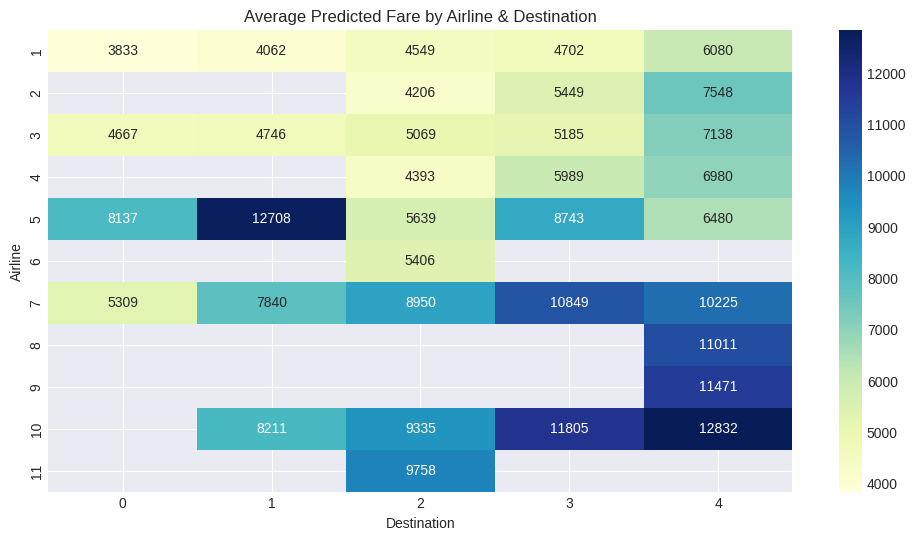

In [ ]:
# Test Set Prediction Analysis


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Add predictions to test data
test_data['Predicted_Fare'] = y_test_pred

#  Summary statistics by Airline
airline_summary = test_data.groupby('Airline')['Predicted_Fare'].agg(
    ['mean', 'median', 'min', 'max', 'count']
).sort_values(by='mean', ascending=False)

print("=== Airline Fare Summary ===")
print(airline_summary)

#  Top 5 most expensive flights
top_fares = test_data.sort_values(by='Predicted_Fare', ascending=False).head(5)
print("\n=== Top 5 Most Expensive Predicted Fares ===")
print(top_fares[['Airline','Source','Destination','Predicted_Fare']])

# Boxplot: Predicted Fare distribution by Airline
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline', y='Predicted_Fare', data=test_data)
plt.xticks(rotation=45)
plt.title('Predicted Fare Distribution by Airline')
plt.ylabel('Predicted Fare')
plt.show()

# Top 5 Destinations by average predicted fare
destination_summary = test_data.groupby('Destination')['Predicted_Fare'].mean().sort_values(ascending=False)
print("\n=== Top 5 Destinations by Average Predicted Fare ===")
print(destination_summary.head(5))

#  Heatmap: Average fare by Airline vs Destination
fare_matrix = test_data.pivot_table(
    index='Airline',
    columns='Destination',
    values='Predicted_Fare',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(fare_matrix, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Predicted Fare by Airline & Destination')
plt.ylabel('Airline')
plt.xlabel('Destination')
plt.show()

#  Distribution of all predicted fares
plt.figure(figsize=(7,4))
sns.histplot(test_data['Predicted_Fare'], kde=True, color='skyblue')
plt.title('Distribution of Predicted Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Quick peek at first 5 predictions
print("\nFirst 5 predictions:", test_data['Predicted_Fare'].head().values)
print("Prediction range: min =", test_data['Predicted_Fare'].min(), ", max =", test_data['Predicted_Fare'].max())

# Project Outcome and Conclusion

The project successfully developed a machine learning model to predict airline ticket fares based on structured flight data.

**Conclusion:**
Among the models tested, the **XGBoost Regressor** achieved the highest overall predictive performance (R² = 0.8197), closely followed by the **LightGBM Regressor** (R² = 0.8183), which demonstrated the lowest average prediction error (MAE = 1099.76). The final model achieved an accuracy where approximately **82%** of the variance in ticket prices is explained by the input features, with a mean prediction error of around ₹1100.

The key features driving the price prediction include:
* Airline
* Destination
* Total Stops
* Duration of the flight (in total minutes)

## Model Outcomes (Accuracy)

Three advanced ensemble models were trained, and their key performance metrics on the test data are as follows:

| Model | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | R-squared (R²) |
| :--- | :--- | :--- | :--- | :--- |
| **XGBoost Regressor** | 1109.97 | 2,841,443.46 | 1685.66 | **0.8197** |
| **LightGBM Regressor** | **1099.76** | 2,862,343.34 | 1691.85 | 0.8183 |
| **Random Forest Regressor** | 1174.87 | 3,209,028.03 | 1791.38 | 0.7960 |

*The Random Forest model also showed a strong mean R² of 0.8159 across 5-Fold Cross-Validation.*


# Limitations (Inferred)

The primary challenges and limitations encountered during the project included:

* **Data Preparation Complexity:** Significant effort was required to convert the raw features into a usable numeric format, especially columns like `Date_of_Journey`, `Arrival_Time`, `Dep_Time`, and `Duration`, which were initially in complex string formats.
* **Target Variable Skewness:** The `Price` target variable exhibited a highly right-skewed distribution (long-tailed behavior) with a maximum price far exceeding the median, indicating a presence of premium/business-class outliers. This skew requires models to be more robust to large values and potentially necessitates a log-transformation for better performance.
* **Data Sparsity/Missing Information:** While most columns were complete, one row contained missing values in `Route` and `Total_Stops`. Furthermore, the `Additional_Info` column had a top frequency of 8,345 records labeled as "No info," limiting the feature's value.
* **Outlier Handling:** Outliers were detected in key numerical features (`Price` and `Duration_total_mins`), which were addressed using IQR and Isolation Forest techniques, resulting in the removal of approximately 2% of the data points.

# Future Work (Inferred)

Based on the machine learning workflow, the following steps are suggested for future improvements:

1.  **Hyperparameter Optimization:** Conduct thorough hyperparameter tuning (e.g., using `GridSearchCV` or `RandomizedSearchCV`) for the high-performing models (XGBoost and LightGBM) to find the absolute optimal set of parameters, which could further increase the R² score.
2.  **Advanced Ensemble Methods:** Implement and test more complex ensemble techniques, such as stacking or blending, combining the predictions of the top models (XGBoost and LightGBM) to potentially achieve even higher accuracy.
3.  **Feature Importance Deep Dive:** Leverage the feature importance insights (derived from the Random Forest model) to potentially prune less important features or engineer new features from the most impactful ones.
4.  **Model Deployment:** Focus on deploying the final, best-performing model (XGBoost or LightGBM) into a production environment (e.g., using a web framework) so it can provide real-time fare predictions to users or pricing strategy recommendations to airlines.

In [ ]:
import os

In [ ]:
import os

# suppose your cleaned dataframe is called df
# Check if the directory exists, and create it if it doesn't
if not os.path.exists('data'):
    os.makedirs('data')

df.to_csv("data/flights.csv", index=False)

In [ ]:
import joblib
import os

# Check if the directory exists, and create it if it doesn't
if not os.path.exists('models'):
    os.makedirs('models')

# suppose your model/pipeline variable is called model or pipeline
joblib.dump(best_lgbm, "models/flight_model.joblib")

['models/flight_model.joblib']

In [ ]:
from google.colab import files

files.download("flights.csv")
files.download("flight_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df.columns)

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Arrival_Day', 'Arrival_Month', 'Duration_total_mins', 'Outlier'],
      dtype='object')
